In [9]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [10]:
import fastf1
session = fastf1.get_session(2024, 'Austria', 'Q')
session.load(telemetry = False, laps = False, weather = False)
verstappen = session.get_driver('VER')
print(f"Pronto {verstappen['FirstName']}?")

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/11/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "/Users/alex/Desktop/learnTo/api/myenv/lib/python3.12/site-packages/requests_cache/session.py", line 291, in _resend
    response.raise_for_status()
  File "/Users/alex/Desktop/learnTo/api/myenv/lib/python3.12/site-packages/requests/models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/11/qualifying.json
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '55', '44', '16', '81', '11', '27', '31', '3', '20', '10', '22', '14', '23

Pronto Max?


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2019/14/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "/Users/alex/Desktop/learnTo/api/myenv/lib/python3.12/site-packages/requests_cache/session.py", line 291, in _resend
    response.raise_for_status()
  File "/Users/alex/Desktop/learnTo/api/myenv/lib/python3.12/site-packages/requests/models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2019/14/qualifying.json
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using 

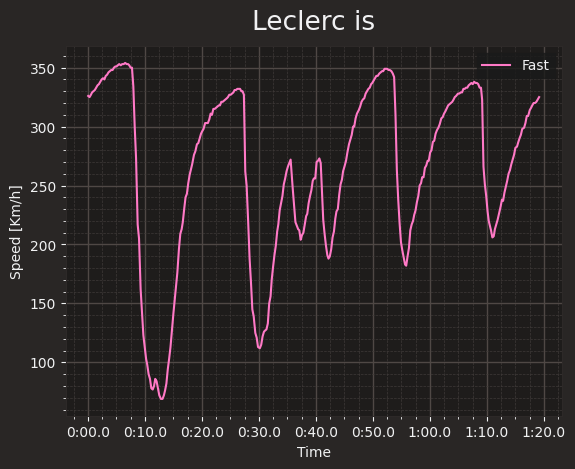

In [11]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [12]:
from urllib.request import urlopen
import json

# URLs for driver data
url1 = "https://api.openf1.org/v1/drivers?driver_number=1&session_key=9158"
url2 = "https://api.openf1.org/v1/drivers?driver_number=11&session_key=9158"

# Fetch and decode the JSON data for both drivers
response1 = urlopen(url1)
response2 = urlopen(url2)
data1 = json.loads(response1.read().decode('utf-8'))
data2 = json.loads(response2.read().decode('utf-8'))

# Function to display driver information
def display_driver_info(driver_data):
    for driver in driver_data:
        print("Driver Information:")
        print(f"Name: {driver.get('full_name')}")
        print(f"Team: {driver.get('team_name')}")
        print(f"Country: {driver.get('country_code')}")
        print("-" * 20)

# Display information for both drivers
display_driver_info(data1)
display_driver_info(data2)

Driver Information:
Name: Max VERSTAPPEN
Team: Red Bull Racing
Country: NED
--------------------
Driver Information:
Name: Sergio PEREZ
Team: Red Bull Racing
Country: MEX
--------------------


In [15]:
year = 2024
wknd = 11
ses = 'R'
driver = 'VER'
colormap = mpl.cm.plasma


In [16]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()

lap = session.laps.pick_driver(driver).pick_fastest()     

# Get telemetry data
x = lap.telemetry['X']
y = lap.telemetry['Y']

color = lap.telemetry['Speed']

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api    

In [18]:
points = np.array([x,y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1::]], axis =1)


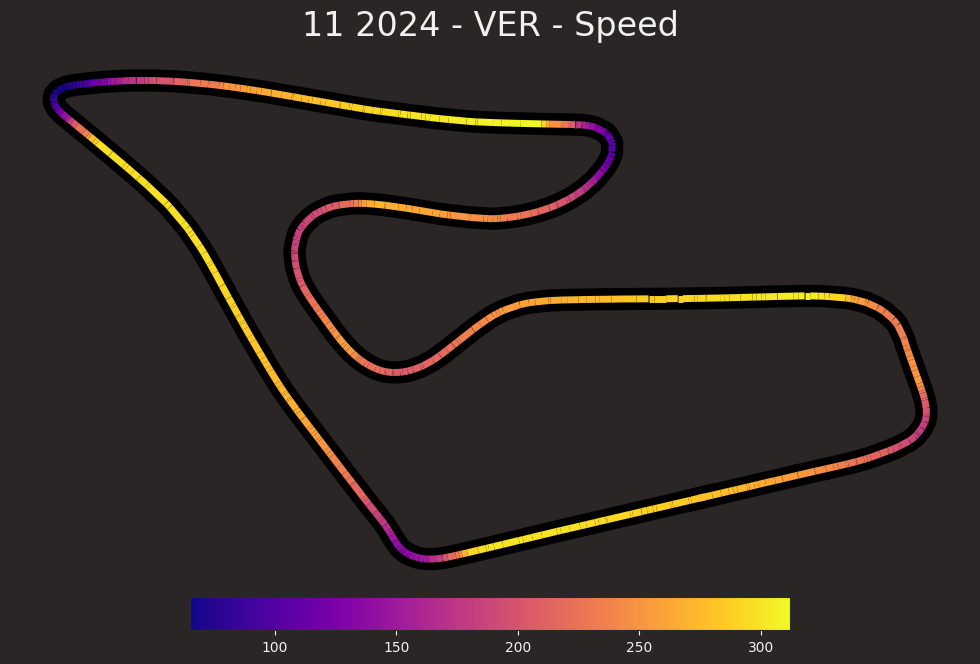

In [19]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")
                                   

In [20]:
plt.show()

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO

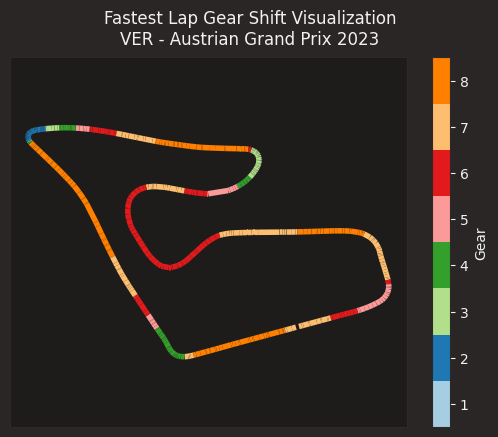

In [24]:
"""Gear shifts on track
=======================

Plot which gear is being used at which point of the track
"""
##############################################################################
# Import FastF1 and load the data

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


session = fastf1.get_session(2023, 'Austrian Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()
# sphinx_gallery_defer_figures

##############################################################################
# Prepare the data for plotting by converting it to the appropriate numpy
# data types

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
# sphinx_gallery_defer_figures

##############################################################################
# Create a line collection. Set a segmented colormap and normalize the plot
# to full integer values of the colormap

cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
# sphinx_gallery_defer_figures

##############################################################################
# Create the plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
# sphinx_gallery_defer_figures


##############################################################################
# Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they
# are centered for each color segment.

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()
